<a href="https://colab.research.google.com/github/FabioNicotra/FabiosPortfolio/blob/develop/01_GeneticAlgorithm/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A silly genetic algorithm
This project was originally assigned during the course *Data Structures in Python* held by Politecnico di Torino in cooperation with Reply IT.

In computer science and operations research, a genetic algorithm is a metaheuristic inspired by the process of natural selection. They are part of a larger families of algorithms known as evolutionary algorithms. Genetic algorithms rely on the existence of a candidates population that evolves in time, exploiting operators such as mutation, crossover and selection, in order to generate high-quality solutions to optimization and search problems.

Genetic algorithms *optimize*, i.e., they select the best solution according to given criteria from a set of available alternatives. They efficiently search the solution space thoroughly enough to avoid picking a good answer when a better one is available. They do not perform exhaustive searches of the space, since they don't try every possible solution. They continuously grade solutions and then use them to make choices going forward.

Genetic algorithms use a *fitness function* to preserve/discard candidates in a population, and then build the next iteration of such a population according to context rules.

The basic process is as follows:
1. Randomly generate a population of solutions
2. Measure the fitness of each solution
3. Select the best solutions and discard the rest
4. Cross over elements in the best solutions to make new solutions
5. Mutate a small number of elements in the solutions by changing their value
6. Return to step 2 and repeat until converge or halt condition.

Halting conditions could either be having found a *good enough* solution or having exhausted all our resources, such as number of iterations or reaching a time deadline.


## The smartest dogs in the world (sort of...)
We strive to algorithmically generate a breed of smarter dogs, i.e., generate a population of dogs with an average smart factor higher than a given threshold, starting from a population way duller than our target.

Let's say for the sake of simplicity that our population has a 50/50 male/female ratio. At each iteration crossover happens, generating new offspring. Most likely the new offspring present the same characteristics of their parents, so we apply mutation to a very limited number of them. Before moving on, we resize our population in order to keep only the smartest individuals. We make sure to keep the same initial gender ratio and the same number of initial individuals. The whole process then becomes a big repeating loop, until convergence or stop.

### Parametrizing our experiments
Here follows a set of constants that we can use to determine how our algorithm will evolve. You can play with these number a see different outcomes for your runs.

In [1]:
TARGET = 100 # Target "smartness" for our population
POP_SIZE = 100 # The size of the population at the start of each iteration (keep this even, if you change it)
INIT_MIN_SMART = 1 # The minimum smartness of a dog at ITER 0
INIT_MAX_SMART = 10 # The maximum smartness of a dog at ITER 0
INIT_MODE_SMART = 3 # The most comon smartness value of a dog at ITER 0
MUTATE_ODDS = 5e-3 # Probability of mutation for a new puppy
MUTATE_MIN_FACTOR = 0.4 # Lower bound for the the product factor we multuply smartness for, if mutation happens
MUTATE_MAX_FACTOR = 1.3 # Upper bound for the the product factor we multuply smartness for, if mutation happens
LITTER_SIZE = 5 # Puppies born from each pair of adult dogs
MAX_ITER = 1000 # Max number of iterations

### Generate the initial population
We want to generate an initial population of a fixed size with a 50/50 gender split ratio, of dogs with a given initial smartness factor according to parameters. The `random.triangular()` function generates random values in a range with a skew toward a wanted mode. In this first implementation, no information about the gender is assigned because of the 50/50 split ratio assumption.

In [2]:
import random

def populate():
    pop = [random.triangular(INIT_MIN_SMART, INIT_MAX_SMART, INIT_MODE_SMART) for _ in range(POP_SIZE)]
    return pop

### Measure the fitness of the population
The goodness of our population is evaluated as the average of the smartness of the individuals with respect to our target value. This function in used as an halting criteria for the main loop.
Functions from the `statistics` module are used for this purpose.

In [3]:
import statistics

def fitness(pop):
    avg = statistics.mean(pop)
    std = statistics.stdev(pop)
    return avg, std

### Breed the next generation of dogs
We have to generate the new offspring. As a rule, we assume that given a pair of parent dogs, a new puppy smartness will lie in that same min-max range, unless mutation occours.
In order to replicate what would happen in nature, we should not assume that smarter dogs pair with smarter dogs. We use `random.shuffle()` on our collection of dogs before pairing them. Each pair breed as many puppies as the litter size parameter indicates.

In [4]:
def breed(pop):
    random.shuffle(pop)
    puppies = []
    for i in range(0,len(pop),2):
        parents_avg = 0.5*(pop[i]+pop[i+1])
        puppies += [random.triangular(pop[i], pop[i+1], parents_avg) for _ in range(LITTER_SIZE)]
    return puppies

### Select the best candidates
At each iteration, we have to resize our current population down to its initial size, preserving only the smartest dogs available for the next iteration. ***We have to make sure to keep also the initial gender split ratio. ***

In [5]:
def select(pop,puppies):
    families = pop + puppies
    families.sort(reverse=True)
    newGen = families[0:POP_SIZE]
    return newGen

### Mutate the set of offspring
A small percentage of the puppies should undergo mutation. This could either lead to a lower or a higher smartness value, since their base value is directly multiplied with a random value in the closed range `[MUTATE_MIN_FACTOR, MUTATE_MAX_FACTOR]`.

In [6]:
import math

def mutate(puppies):
    size = len(puppies)
    mutants = math.floor(size*MUTATE_ODDS)
    random.shuffle(puppies)
    for i in range(mutants):
        puppies[i] = puppies[i]*random.uniform(MUTATE_MIN_FACTOR,MUTATE_MAX_FACTOR)

### Put it all together
The `main()` function manages the other functions and the primary evolutionary loop. It is also responsible for printing all the relevant information and outputs of our experiment.

Numpy was not originally used for the assignment, but I included some lines of code to store the data for visualization.

In [7]:
import numpy as np

dogs = populate()
avg, std = fitness(dogs)
n_iter = 0

avg_vector, std_vector = np.full((2,MAX_ITER), 0, dtype=float)
min_vector, max_vector = np.full((2,MAX_ITER), 0, dtype=float)

while avg < TARGET and n_iter < MAX_ITER:
    if n_iter > 0:
        litter = breed(dogs)
        mutate(litter)
        dogs = select(dogs, litter)
        avg, std = fitness(dogs)
    print(f"Iter {n_iter}, avg = {avg:.2f}, std = {std:.2f}, min = {min(dogs):.2f}, max = {max(dogs):.2f}")

    avg_vector[n_iter], std_vector[n_iter] = avg, std
    min_vector[n_iter], max_vector[n_iter] = min(dogs), max(dogs)

    n_iter += 1

iter_vector = np.arange(0,n_iter)
avg_vector, std_vector = avg_vector[:n_iter], std_vector[:n_iter]
min_vector, max_vector = min_vector[:n_iter], max_vector[:n_iter]

Iter 0, avg = 4.72, std = 1.90, min = 1.33, max = 8.82
Iter 1, avg = 6.68, std = 0.73, min = 5.54, max = 8.82
Iter 2, avg = 7.40, std = 0.34, min = 7.02, max = 8.82
Iter 3, avg = 7.76, std = 0.22, min = 7.54, max = 8.82
Iter 4, avg = 7.97, std = 0.17, min = 7.82, max = 8.82
Iter 5, avg = 8.15, std = 0.15, min = 8.00, max = 8.82
Iter 6, avg = 8.29, std = 0.11, min = 8.20, max = 8.82
Iter 7, avg = 8.41, std = 0.11, min = 8.31, max = 8.82
Iter 8, avg = 8.53, std = 0.09, min = 8.43, max = 8.82
Iter 9, avg = 8.63, std = 0.05, min = 8.57, max = 8.82
Iter 10, avg = 8.69, std = 0.03, min = 8.65, max = 8.82
Iter 11, avg = 8.74, std = 0.24, min = 8.70, max = 11.06
Iter 12, avg = 8.84, std = 0.40, min = 8.72, max = 11.06
Iter 13, avg = 9.09, std = 0.51, min = 8.74, max = 11.06
Iter 14, avg = 9.66, std = 0.35, min = 9.28, max = 11.06
Iter 15, avg = 10.04, std = 0.28, min = 9.76, max = 11.06
Iter 16, avg = 10.35, std = 0.29, min = 10.12, max = 12.24
Iter 17, avg = 10.62, std = 0.27, min = 10.40, ma

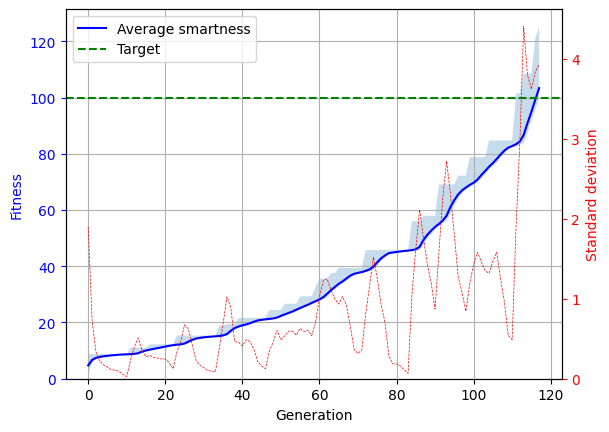

In [8]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

ax1.plot(iter_vector, avg_vector, 'b-', label='Average smartness')
ax1.fill_between(iter_vector, y1 = min_vector, y2 = max_vector, alpha = 0.25)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness', color='b')
ax1.tick_params('y', colors='b')
plt.axhline(y=TARGET, color='g', linestyle='--', label='Target')
plt.legend(loc='upper left')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()

ax2.plot(iter_vector, std_vector, 'r--', linewidth=0.5, label='Data 2')
ax2.set_ylabel('Standard deviation', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim(bottom=0)

ax1.grid(True)
plt.show()


The plot show the evolution of the poulation smartness, as well as the standard deviation of its fitness. Some conclusions about genetic algorithms can be drawn from it:

1. Convergence: As the generations progress, if the average fitness steadily increases while the standard deviation decreases, it indicates that the genetic algorithm is converging towards a better solution. This suggests that the algorithm is effectively exploring and exploiting the search space, gradually improving the population's fitness.

2. Plateau or Stagnation: If the average fitness remains relatively constant over multiple generations, accompanied by a low standard deviation, it indicates that the algorithm has reached a plateau or stagnation point. This implies that further progress in improving the fitness is limited, and alternative strategies may need to be considered, such as modifying the genetic operators, increasing the population size, or exploring different parameter settings.

3. Exploration vs. Exploitation: Observing the relationship between the average fitness and standard deviation can provide insights into the balance between exploration and exploitation in the genetic algorithm. If the average fitness increases, but the standard deviation remains high, it suggests that the algorithm is actively exploring the search space, introducing diversity into the population. On the other hand, if the average fitness increases, accompanied by a decreasing standard deviation, it indicates that the algorithm is focusing more on exploiting promising solutions within a narrower region of the search space.

4. Early Convergence or Premature Stagnation: If the average fitness quickly reaches a high level but the standard deviation remains large, it suggests the possibility of early convergence or premature stagnation. In such cases, the algorithm may have prematurely converged to a suboptimal solution due to limited exploration, leading to a lack of diversity in the population.




## Object-oriented revision
This second section presents a revised implementation of the problem, leveraging an object-oriented paradigm. While the primary focus remains on the genetic algorithm, I have introduced additional features that showcase the advantages of an object-oriented approach. These supplementary functionalities, although not essential to the genetic algorithm itself, demonstrate how an object-oriented paradigm enables easier implementation. By incorporating these features, the code becomes more versatile and highlights the flexibility and extensibility of object-oriented programming.

The population size of the genetic algorithm is made variable. To facilitate this, two additional constants have been introduced: the initial population size and its maximum allowed value.

In [9]:
INIT_POP_SIZE = 10 # The size of the population at ITER 0
MAX_POP_SIZE = POP_SIZE # The maximum size of the population

### Dog class
The `Dog` class is designed to encapsulate information about individual dogs, including their gender and smartness. This object-oriented approach provides a convenient and organized way to store and access data specific to each dog. Additionally, the Dog class offers a straightforward comparison mechanism by evaluating the smartness of two dogs. This simplifies the process of comparing dogs and enables efficient sorting or ranking.

In [10]:
class Dog:
    def __init__(self, smartness=INIT_MIN_SMART):
        self.gender = 'm' if random.getrandbits(1) else 'f'
        self.smartness = smartness

    def __repr__(self):
        className = type(self).__name__
        gender = 'male' if self.gender == 'm' else 'female'
        return f"{className}, {gender}, smartness = {self.smartness:.2f}"

    def __eq__(self, other):
        if isinstance(other, Dog):
            return self.smartness == other.smartness
        return NotImplemented

    def __lt__(self,other):
        if isinstance(other, Dog):
            return self.smartness < other.smartness
        return NotImplemented

### Breed class
The `Breed` class represents a collection of distinct `Dog` objects, each possessing its own smartness and gender attributes. Unlike the previous version, the population no longer adheres to a fixed 50/50 gender split ratio. Instead, the `mate()` method, implemented within the `Breed` class, takes charge of forming couples by maximizing the number of allowable pairs.

In [11]:
class Breed:
    def __init__(self, pop_size=INIT_POP_SIZE, litter_size=LITTER_SIZE):
        self.pop_size = pop_size
        self.litter_size = litter_size
        self.individuals = [Dog(random.triangular(INIT_MIN_SMART, INIT_MAX_SMART, INIT_MODE_SMART)) for _ in range(pop_size)]

    def countGender(self):
        genders = [self.individuals[i].gender for i in range(len(self.individuals))]
        m = genders.count('m')
        f = genders.count('f')
        return m,f

    def fitness(self):
        pts = [self.individuals[i].smartness for i in range(len(self.individuals))]
        avg = statistics.mean(pts)
        std = statistics.stdev(pts)
        return avg, std

    def mate(self):
        males = list()
        females = list()
        litter = list()
        for i in range(len(self.individuals)):
            males.append(self.individuals[i]) if self.individuals[i].gender == 'm' else females.append(self.individuals[i])
        random.shuffle(males)
        random.shuffle(females)
        nCouples = min(len(males),len(females))
        for i in range(nCouples):
            mother_pts = females[i].smartness
            father_pts = males[i].smartness
            litter += [Dog(random.uniform(mother_pts, father_pts)) for _ in range(self.litter_size)]
        self.mutate(litter)
        self.individuals += litter
        return

    def select(self,max_pop_size = MAX_POP_SIZE):
        self.individuals.sort(reverse=True)
        if len(self.individuals)>max_pop_size:
            del self.individuals[max_pop_size:]
        return

    def mutate(self, litter):
        size = len(litter)
        mutants = math.floor(size*MUTATE_ODDS)
        random.shuffle(litter)
        for i in range(mutants):
            litter[i].smartness = litter[i].smartness *random.uniform(MUTATE_MIN_FACTOR,MUTATE_MAX_FACTOR)

    def __repr__(self):
        className = type(self).__name__
        m,f = self.countGender()
        avg, std = self.fitness()
        return f"Population = {len(self.individuals)} ({m} males, {f} females)\n Fitness: avg = {avg:.2f}, std = {std:.2f}"


In [12]:
dogs = Breed()
avg, _ = dogs.fitness()
n_iter = 0

avg_vector, std_vector = np.full((2,MAX_ITER), 0, dtype=float)
min_vector, max_vector = np.full((2,MAX_ITER), 0, dtype=float)

while avg < TARGET and n_iter < MAX_ITER:
    if n_iter > 0:
        dogs.mate()
        dogs.select()
    avg, std = dogs.fitness()
    print(f"Generation {n_iter}: {dogs}")

    avg_vector[n_iter], std_vector[n_iter] = avg, std
    min_vector[n_iter], max_vector[n_iter] = min(dogs.individuals).smartness, max(dogs.individuals).smartness

    n_iter += 1

iter_vector = np.arange(0,n_iter)
avg_vector, std_vector = avg_vector[:n_iter], std_vector[:n_iter]
min_vector, max_vector = min_vector[:n_iter], max_vector[:n_iter]

Generation 0: Population = 10 (7 males, 3 females)
 Fitness: avg = 4.43, std = 2.01
Generation 1: Population = 25 (13 males, 12 females)
 Fitness: avg = 4.41, std = 1.69
Generation 2: Population = 85 (47 males, 38 females)
 Fitness: avg = 4.49, std = 1.48
Generation 3: Population = 100 (55 males, 45 females)
 Fitness: avg = 5.86, std = 0.93
Generation 4: Population = 100 (47 males, 53 females)
 Fitness: avg = 6.80, std = 0.83
Generation 5: Population = 100 (42 males, 58 females)
 Fitness: avg = 7.70, std = 0.45
Generation 6: Population = 100 (53 males, 47 females)
 Fitness: avg = 8.18, std = 0.23
Generation 7: Population = 100 (51 males, 49 females)
 Fitness: avg = 8.42, std = 0.12
Generation 8: Population = 100 (51 males, 49 females)
 Fitness: avg = 8.55, std = 0.06
Generation 9: Population = 100 (45 males, 55 females)
 Fitness: avg = 8.61, std = 0.03
Generation 10: Population = 100 (47 males, 53 females)
 Fitness: avg = 8.64, std = 0.02
Generation 11: Population = 100 (53 males, 47 f

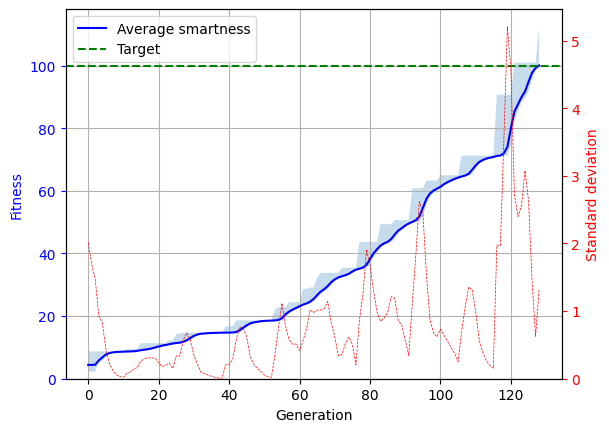

In [13]:
fig2, ax3 = plt.subplots()

ax3.plot(iter_vector, avg_vector, 'b-', label='Average smartness')
ax3.fill_between(iter_vector, y1 = min_vector, y2 = max_vector, alpha = 0.25)
ax3.set_xlabel('Generation')
ax3.set_ylabel('Fitness', color='b')
ax3.tick_params('y', colors='b')
plt.axhline(y=TARGET, color='g', linestyle='--', label='Target')
plt.legend(loc='upper left')
ax3.set_ylim(bottom=0)

ax4 = ax3.twinx()

ax4.plot(iter_vector, std_vector, 'r--', linewidth=0.5, label='Data 2')
ax4.set_ylabel('Standard deviation', color='r')
ax4.tick_params('y', colors='r')
ax4.set_ylim(bottom=0)

ax3.grid(True)
plt.show()
